In [1]:
from tensorflow import keras

### 케라스에서 제공해주는 훈련 및 테스트 이미지 데이터 사용

In [2]:
keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
### 훈련 및 테스트 데이터로 받아오기
# - 데이터 : 패션 이미지 데이터
train_input, train_target = \
             keras.datasets.fashion_mnist.load_data()[0][:]

test_input, test_target = \
             keras.datasets.fashion_mnist.load_data()[1][:]

In [4]:
train_input.shape, train_target.shape

((60000, 28, 28), (60000,))

In [5]:
test_input.shape, test_target.shape

((10000, 28, 28), (10000,))

### 이미지 샘플 그려보기

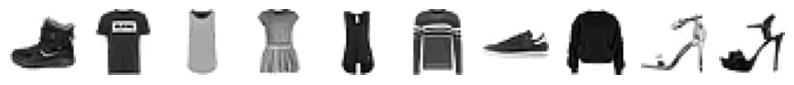

In [6]:
import matplotlib.pyplot as plt

## 큰 그래프 안에 작은 공간 10개 만들기(1행1열)
fit, axs = plt.subplots(1, 10, figsize=(10,10))


### 10개만 추출해서 그려보기
for i in range(10) :
    ### 작은 공간에 이미지 10개를 각각 보여주기
    axs[i].imshow(train_input[i], cmap="gray_r")
    
    ### 그래프의 x축과 y축 보여주지 않기 설정
    axs[i].axis("off")
    
### 그래프 그리기
plt.show()

In [7]:
[train_target[i] for i in range(10)]

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]

In [8]:
import numpy as np
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [9]:
### 픽셀 데이터 : 0~255 사이의 값으로 구성되어 있음
train_input[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

### 분류모델을 이용해서 분류하기(로지스틱)
#### 이미지 데이터 훈련시 전처리(정규화작업)

In [10]:
# 데이터를 0 ~ 1 사이의 값으로 정규화
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [11]:
# 산술식으로 정규화하기
train_scaled = train_input / 255.0
train_scaled

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [12]:
train_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
train_scaled.shape

(60000, 28, 28)

### 차원 축소하기
#### 훈련을 하기 위해서는 2차원 데이터로 만들어야 함
#### 이후 이미지로 보고자 할 대는 3차원으로 만든 후 시각화
#### 픽셀 데이터 2차원을 1차원 수평적 픽셀데이터로 변환하기
#### 행의 갯수 6만개, 차원(28*28) 784개 데이터

In [15]:
train_scaled = train_scaled.reshape(-1, 28 * 28)
train_scaled.shape

(60000, 784)

In [16]:
# 이미지 데이터 분류하기(로지스팃 회귀 모델로 )
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate

In [19]:
"""
SGDClassifier(확률적경사하강법) 사용
- 딥러닝에서 사용하는 기본 알고리즘
- 경사하강법에 의해 딥러닝 라이브러리들이 계속해서 만들어짐
- 정규화된 선형분류모델로 계산값을 기반으로
  0보다 작으면 -1,
  0보다 크면 1로 분류하는 이진분류 사용
  - 사람이 개입하지 않고 모델이 알아서 계산하게 됨"""

'\nSGDClassifier(확률적경사하강법) 사용\n- 딥러닝에서 사용하는 기본 알고리즘\n- 경사하강법에 의해 딥러닝 라이브러리들이 계속해서 만들어짐\n- 정규화된 선형분류모델로 계산값을 기반으로\n  0보다 작으면 -1,\n  0보다 크면 1로 분류하는 이진분류 사용\n  - 사람이 개입하지 않고 모델이 알아서 계산하게 됨'

###  기계학습 모델 생성하기
#### loss : 손실함수로 log(logistic regression 알고리즘)
#### --> 손실함수는 정답과 예측값이 얼마나 차이가 나는지를 나타내는 값
#### --> 목적지에 다다를때까지 손실을 줄여 가면서 경사를 내려가게 됨

#### max_iter : 훈련 반복횟수(기본은 1000)

In [18]:

sc = SGDClassifier(loss = 'log',
                  max_iter=5,
                  random_state=42)
sc

SGDClassifier(loss='log', max_iter=5, random_state=42)

#### 교차검증 방식으로 검증결과 확인하기
#### n_jobs : 시스템에서 사용할 CPU 갯수 지정 = -1은 모두 사용



In [20]:
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
scores

{'fit_time': array([3.71610928, 3.65364194, 3.63798618, 3.65364194, 3.79421973]),
 'score_time': array([0.03124976, 0.04684114, 0.01565576, 0.04684114, 0.01562405]),
 'test_score': array([0.82908333, 0.81941667, 0.82075   , 0.80916667, 0.818     ])}

In [21]:
### scores정확도 평균
np.mean(scores['test_score'])

0.8192833333333333

###  텐서플로 케라스 모델

In [22]:
from tensorflow import keras

#### 훈련 및 검증데이터 분리하기


In [23]:
from sklearn.model_selection import train_test_split

In [28]:
train_scaled, val_sclaed, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
train_scaled.shape, val_sclaed.shape, train_target.shape, val_target.shape

((38400, 784), (9600, 784), (38400,), (9600,))

### 2. 신경망 모델 계층 생성

#### 딥러닝은 계층 구조로 되어있음
#### 계층구조 : 입력층 > 은닉층 ...(전처리층) > 출력층

#### - 첫번째 10 : 출력개수로 뉴런개수(정답갯수)
#### - kernel_initializer : 커널 토기화 함수로 균등분포(uniform)로 초기화
#### - activation : 활성화함수로 출력알고리즘 정의 : softmax(다중분류), sigmoid(이진분류) 
#### - input_shape : 입력데이터의 갯수(1차원)

In [26]:
dense = keras.layers.Dense(10, kernel_initializer='uniform',
                          activation='softmax',
                          input_shape=(784,))
dense

###  인공신경망 클래스 생성

In [27]:
model = keras.Sequential(dense)
model

###  모델 설정단계(compile)를 거쳐야 함
#### loss : 손실함수로 종속변수의 성격에 따라 손실알고리즘 지정
####  - 이진분류 : binary_crossentropy 함수 사용
####  - 다중분류(원핫인코딩) : categorical_crossentropy : 종속변수의 형태 [[0,1,2], [0,3,1]]
####  - 다중분류(숫자) : sparse_categorical_crossentropy : 종속변수의 형태 [0,1,2,3,4]
####  * 주로 이진분류와 다중분류(숫자)함수가 사용됨
####  - metrics : 훈련할 때 반복에 따른 손실값과 정확도 출력해 주기


In [29]:
model.compile(loss='sparse_categorical_crossentropy',
             metrics='accuracy')

### 훈련하기
#### epoch마다 loss는 낮아지고 accuracy는 올라가야 함

In [30]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1200/1200 [==============================] - 1s 364us/step - loss: 0.6317 - accuracy: 0.7865
Epoch 2/5
1200/1200 [==============================] - 0s 348us/step - loss: 0.4889 - accuracy: 0.8340
Epoch 3/5
1200/1200 [==============================] - 0s 348us/step - loss: 0.4630 - accuracy: 0.8444
Epoch 4/5
1200/1200 [==============================] - 0s 348us/step - loss: 0.4508 - accuracy: 0.8498
Epoch 5/5
1200/1200 [==============================] - 0s 371us/step - loss: 0.4419 - accuracy: 0.8521


In [31]:
train_scaled.shape

(38400, 784)

####  검증데이터를 이용해서 검증결과 확인하기
#### model.evaluate(검증, 타겟)

In [32]:
scores = model.evaluate(val_sclaed, val_target)
scores

300/300 [==============================] - 0s 350us/step - loss: 0.4260 - accuracy: 0.8626


[0.4260092079639435, 0.8626041412353516]

### layer(계층) 추가하기
#### - 10개 출력값, 균등하게 처리, relu활성화 함수, 784개 입력
#### - 처음 계층과 동일한 형태로 만든 계층이기에 큰 차이는 없음
#### - 처음 추가하는 방법만 확인

In [36]:
model.add(keras.layers.Dense(10, kernel_initializer='uniform',
                          activation='relu',
                          input_shape=(784,)))

###  모델 재훈련

In [35]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1200/1200 [==============================] - 0s 366us/step - loss: 0.4356 - accuracy: 0.8546
Epoch 2/5
1200/1200 [==============================] - 0s 362us/step - loss: 0.4311 - accuracy: 0.8581
Epoch 3/5
1200/1200 [==============================] - 0s 378us/step - loss: 0.4267 - accuracy: 0.8589
Epoch 4/5
1200/1200 [==============================] - 0s 352us/step - loss: 0.4237 - accuracy: 0.8585
Epoch 5/5
1200/1200 [==============================] - 0s 358us/step - loss: 0.4208 - accuracy: 0.8603


#### 재검증하기
#### - 손실율 0.43376174569129944, 
#### - 정확도 0.8608333468437195

In [37]:
scores = model.evaluate(val_sclaed, val_target)
scores

300/300 [==============================] - 0s 378us/step - loss: 0.4338 - accuracy: 0.8608


[0.43376174569129944, 0.8608333468437195]

### 모델 계층 구조 확인

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
